In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks')

In [132]:
data = pd.read_csv('AllData.csv')
#data_equations = pd.read_csv('Dataequations.csv')
#print(data.columns)

data = data.loc[:, data.columns!='Unnamed: 0']
data = data.loc[:, data.columns!='Timestamp']



#data_eq = [data, data_equations]

#data = pd.concat(data_eq, axis = 1)

#data = data.dropna()
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,2.0,8.755036,8.356174,0.368908,-3.002270,-1.470623,12.933638,14.674528,6.918777,0.411152,...,6.404797,7.171509,-1.750720,-3.266157,-0.576994,11.126944,9.307355,2.241517,-5.361687,-2.972842
1,2.0,5.475442,0.026379,1.547025,-3.251407,-7.513612,13.867902,9.514652,4.679568,-1.208829,...,2.997304,-0.812548,0.398677,-4.470396,-7.422709,7.228529,3.362044,1.831480,-2.025040,-6.667974
2,2.0,7.483816,5.432224,3.991340,-0.852330,-7.928528,9.171654,3.081106,-1.520891,1.430536,...,6.306486,3.026712,2.350238,-3.198835,-10.527682,5.582832,5.898288,-0.415406,-2.538356,-6.225558
3,2.0,3.788280,3.142704,5.357454,-3.125920,-8.418598,14.958658,-3.865107,-1.270962,-6.880674,...,-4.154253,1.719881,4.484347,-2.885985,-5.871274,2.695847,0.027494,2.288725,-1.293209,-6.439173
4,2.0,13.159506,6.951650,1.820282,0.610754,-4.038634,16.359430,7.333524,5.555811,1.069744,...,10.867407,6.503692,3.001653,-0.858176,-5.876140,8.031476,2.329094,2.424413,-1.034964,-5.401030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,7.0,11.586341,5.157209,1.065677,-1.330240,-4.148602,19.672706,8.575988,-0.063496,-2.378711,...,4.773320,0.103613,1.146601,0.018922,1.897509,13.311523,3.399435,0.759105,0.326330,-0.574893
34123,7.0,2.217390,-0.969838,-7.037413,-2.785163,-1.092282,5.634407,-1.794864,-0.752748,-1.134496,...,1.119300,-0.174167,-8.742986,-0.845129,0.615308,2.509049,-2.448023,-3.684307,0.681193,0.305190
34124,7.0,1.372737,0.432618,2.158286,-1.646520,-4.159025,10.055436,3.385120,-0.384305,-9.000250,...,0.751798,-1.373922,-1.069736,-6.371254,-1.892207,9.011200,3.311913,2.694148,2.156377,1.811708
34125,7.0,8.378012,5.396366,3.122233,1.540864,-2.186366,20.819564,17.821430,10.326110,0.690398,...,9.949835,2.207045,0.776558,1.410368,-3.118813,4.956218,3.376753,0.618586,0.496981,2.880997


In [133]:
#making binary

#data = data.loc[data['target']!= 2.0]
datalow = data[data['target'] == 2.0]
data6 = data[data['target'] == 6.0]
data7 = data[data['target'] == 7.0]

frames = [data6, data7]

datahigh = pd.concat(frames)

datahigh['target'] = 1
datalow['target'] =0

hilow = [datalow, datahigh]

data = pd.concat(hilow)

C:\Users\anita\AppData\Local\Temp\ipykernel_21456\1476810407.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datalow['target'] =0


In [51]:
def EQ1(alpha, theta):
        return alpha/theta

equation1 = EQ1(data['POzAlpha'], data['POzTheta'])
equation1.fillna(0,inplace=True)

data['Equation1'] = equation1


def EQ2(theta, beta):
    return theta/beta

sumTheta = (data['FzTheta']+ data['F3Theta'] + data['F4Theta'])/3
sumBeta = (data['FzBeta'] + data['F3Beta'] +  data['F4Beta'])/3
sumAlpha = (data['FzAlpha'] + data['F3Alpha'] + data['F4Alpha'])/3
equation2 = EQ2(sumTheta, sumBeta)

data['EQ_Frontal'] = equation2

equation2_2 = EQ2(data['POzTheta'], data['POzBeta'])

data['EQ_POz'] = equation2_2

def EQ3(alpha, beta, theta):
    return (alpha + beta) /theta

equation3 = EQ3(sumAlpha, sumBeta, sumTheta)
eq3_po = EQ3(data['POzAlpha'], data['POzBeta'], data['POzTheta'])

data['Equation3'] = equation3
data['Eq3_POz'] = eq3_po

def EQ4(alpha, beta, theta):
    return (alpha+theta)/beta


equation4 = EQ4(sumAlpha, sumBeta, sumTheta)
eq4_po = EQ4(data['POzAlpha'], data['POzBeta'], data['POzTheta'])

data['Equation4'] = equation4
data['Eq4_POz'] = eq4_po


equations = ['Equation1','EQ_Frontal', 'EQ_POz', 'Equation3', 'Eq3_POz', 'Equation4', 'Eq4_POz']
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P4Alpha,P4Beta,P4Gamma,Equation1,EQ_Frontal,EQ_POz,Equation3,Eq3_POz,Equation4,Eq4_POz
1134,1,6.853020,4.797918,4.019110,-1.042116,-4.878493,6.485423,6.988548,4.063920,0.251062,...,1.380253,-0.531494,-4.685704,0.837678,6.465783,-4.604013,0.732234,0.620476,10.200252,-8.460693
1135,1,13.107873,3.459982,2.714346,-3.286651,-4.923508,13.031096,3.647830,1.764354,-1.684123,...,-0.208686,-5.526153,-4.543356,0.784497,-4.463125,-1.052738,0.288051,-0.165407,-6.748733,-1.878608
1136,1,12.331025,6.633413,5.845984,-4.842002,-4.964197,12.016694,6.327546,4.915525,-9.876522,...,3.248074,-7.549738,-3.361847,0.881294,-1.138171,-1.369973,-0.037102,0.151352,-2.095943,-2.577322
1137,1,5.487631,1.588589,0.680059,-3.950020,-8.363897,12.565410,7.579651,4.935788,-4.345474,...,-1.924664,-6.113373,-9.353155,0.428090,-8.118422,-0.402172,0.424648,-2.058406,-12.565895,-0.574338
1138,1,-1.431666,-3.408437,4.689662,-1.252940,-8.252980,18.077265,5.455184,5.205358,0.203952,...,6.695691,-1.138935,-8.101346,-1.375898,-9.896028,2.720351,0.906886,-1.008298,-19.870595,-1.022575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,1,11.586341,5.157209,1.065677,-1.330240,-4.148602,19.672706,8.575988,-0.063496,-2.378711,...,0.759105,0.326330,-0.574893,0.206638,-2.101999,-3.876901,-0.532617,-0.051300,-1.982438,-4.678018
34123,1,2.217390,-0.969838,-7.037413,-2.785163,-1.092282,5.634407,-1.794864,-0.752748,-1.134496,...,-3.684307,0.681193,0.305190,7.256277,1.653772,0.348216,1.157072,10.128059,2.567305,2.874966
34124,1,1.372737,0.432618,2.158286,-1.646520,-4.159025,10.055436,3.385120,-0.384305,-9.000250,...,2.694148,2.156377,1.811708,4.988898,-0.710472,-0.262747,-1.388374,1.182951,-0.724071,-1.573563
34125,1,8.378012,5.396366,3.122233,1.540864,-2.186366,20.819564,17.821430,10.326110,0.690398,...,0.618586,0.496981,2.880997,0.578581,27.586918,3.502169,0.629819,0.864118,43.961682,5.528456


## Stratify

In [134]:
(data['target'].value_counts()) 

0    13767
1    11487
Name: target, dtype: int64

In [135]:
data = data.groupby('target', group_keys=False).apply(lambda x: x.sample(11487))

In [136]:
(data['target'].value_counts()) 

0    11487
1    11487
Name: target, dtype: int64

In [111]:
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
30675,1,8.957664,13.572945,18.038587,5.476661,-9.502973,9.826992,9.773068,14.222655,1.202685,...,7.953914,12.289347,15.908549,2.927346,-10.779363,4.021734,11.485176,16.126342,1.793587,-8.097836
22469,1,2.127201,-1.528305,0.743532,-3.354556,-1.340266,4.013557,3.416297,2.903796,-4.306527,...,1.625459,-0.311730,4.018139,-2.755397,-1.329687,0.764298,2.244422,3.610223,-2.759073,0.140277
13371,1,11.055202,-1.488027,2.006597,-0.762013,-3.850112,14.911992,-1.551041,-2.654247,-4.881921,...,13.588117,4.305659,-0.611410,-1.543803,-2.549489,5.499635,-8.097179,-1.382575,-0.791101,-5.061500
19845,1,23.467107,12.147373,-1.781772,-4.886401,-3.823321,23.803920,11.408095,-0.671033,-5.007542,...,24.008257,12.667730,-2.208318,-2.109441,-2.163252,24.196541,10.433922,-0.981158,-5.607198,-5.477260
22099,1,2.484120,-2.193746,0.238782,0.608381,-4.442607,4.650700,0.411980,5.067601,-0.728337,...,1.495728,-1.692407,1.314822,0.195962,-3.490335,1.589589,-0.724672,-3.672717,-0.030246,-3.373691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,1,-0.365979,0.028737,-0.784710,-5.181717,-9.763665,5.237435,4.600302,2.157256,-1.437112,...,-4.880596,-4.599446,-4.111916,-4.287993,-10.665289,-5.817508,3.441503,1.287957,-3.312030,-7.969741
19674,1,-0.459931,-0.988385,-0.176618,-3.135649,-9.978233,6.758037,5.434980,-2.567302,-1.629347,...,-0.394491,-2.350607,-1.673141,-0.579445,-9.448830,3.582078,1.015850,-0.643699,-1.181036,-11.642562
8019,1,9.518322,3.911453,-0.576294,-5.969749,-7.110912,11.997075,1.450606,-2.575632,-5.791649,...,8.572402,3.556106,1.869364,-3.863028,-6.274717,10.407819,5.137310,-2.172621,-6.526514,-5.922955
13091,1,12.582166,9.418410,5.036919,1.235469,-7.804508,24.060918,20.136304,11.726013,-2.694493,...,12.612682,9.230872,4.699175,-1.657462,-7.323048,14.620887,10.977337,2.430758,0.115835,-8.651540


In [175]:
high_relevant = ['FzGamma', 'C4Delta', 'POzGamma', 'C3Gamma', 'P4Gamma', 'F3Gamma',
                'C4Gamma', 'F4Delta','FzDelta' ]



In [61]:

channelPOz = ['POzAlpha', 'POzBeta','POzGamma','POzDelta' ,'POzTheta']
channelP3 = ['P3Alpha' ,'P3Beta' ,'P3Gamma','P3Delta','P3Theta']
channelP4 = ['P4Alpha' ,'P4Beta' ,'P4Gamma','P4Delta','P4Theta']
channelFz = ['FzAlpha' ,'FzBeta' ,'FzGamma','FzDelta','FzTheta']
channelF3 = ['F3Alpha' ,'F3Beta','F3Gamma','F3Delta','F3Theta']
channelF4 = ['F4Alpha' ,'F4Beta' ,'F4Gamma','F4Delta','F4Theta']
channelCz = ['CzAlpha', 'CzBeta','CzGamma','CzDelta','CzTheta']
channelC3 = ['C3Alpha','C3Beta','C3Gamma','C3Delta','C3Theta']
channelC4 = ['C4Alpha','C4Beta','C4Gamma','C4Delta','C4Theta']

alphanodes = ['POzAlpha','P3Alpha','P4Alpha','FzAlpha','F3Alpha','F4Alpha','CzAlpha','C3Alpha','C4Alpha']
betanodes = ['POzBeta','P3Beta','P4Beta','FzBeta','F3Beta','F4Beta','CzBeta','C3Beta','C4Beta']
gammanodes = ['POzGamma','P3Gamma','P4Gamma','FzGamma','F3Gamma','F4Gamma','CzGamma','C3Gamma','C4Gamma']
deltanodes = ['POzDelta','P3Delta','P4Delta','FzDelta','F3Delta','F4Delta','CzDelta','C3Delta','C4Delta']
thetanodes = ['POzTheta','P3Theta','P4Theta','FzTheta','F3Theta','F4Theta','CzTheta','C3Theta','C4Theta']



In [63]:

data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
26533,1,7.162573,1.311681,-6.127817,-5.871738,-7.099747,19.093995,11.989379,2.769661,-4.520597,...,9.305410,0.418140,-8.466400,-3.595518,-6.362815,5.506737,-1.455264,-5.384863,-3.673732,-7.785399
7942,1,21.556960,11.443109,7.113285,-0.198533,-4.752013,24.620484,13.033444,6.915305,1.502153,...,22.123558,13.218830,8.149533,-0.493299,-3.679838,20.692320,11.386609,6.131643,-0.151931,-3.027357
22474,1,2.834796,0.266876,-2.615496,-1.029579,-0.896317,4.015202,0.529616,-2.167876,-0.772217,...,-0.237802,0.430668,-2.573299,-0.201147,-0.371479,0.735602,-0.229587,2.690228,-0.495502,1.097553
24413,1,4.618723,5.457452,7.325073,-3.470547,-5.476223,19.403145,8.483183,7.439789,-4.616432,...,7.719474,4.539788,1.574592,-6.402146,-8.880647,2.525085,7.009351,7.645521,-4.726181,-4.977726
22235,1,2.001372,0.294938,4.691285,1.826321,-2.940995,8.506428,5.951031,6.532823,1.646826,...,2.886003,1.242497,5.390150,2.029984,-1.960121,-3.513432,-1.330738,4.665431,2.491289,-2.469007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24068,1,8.240825,0.311270,-0.138163,-2.651578,-5.068524,14.607183,4.642532,2.214758,-7.569531,...,11.968320,1.655508,-0.396815,-5.380471,-5.970121,4.451140,1.381041,-0.175747,-4.882231,-5.459971
1470,1,10.198893,4.432870,8.452325,-0.312058,-5.809292,17.666277,8.354472,7.386773,-2.156564,...,5.911225,3.656050,6.482115,-1.431577,-5.604260,9.650970,-1.328269,7.496852,-0.468140,-7.787856
26429,1,8.622940,3.092329,3.281002,-6.246721,-11.384244,-3.397922,-2.142412,4.805756,-3.129231,...,10.291334,2.957785,2.144139,-6.482008,-10.368606,6.029002,2.668270,1.998130,-6.434114,-11.821395
15376,1,7.446322,5.151700,-1.149986,-8.484876,-8.076286,8.069294,6.128791,-1.063171,-8.418669,...,8.272207,4.354142,-2.800329,-8.546019,-6.796207,6.756567,2.851090,-3.767518,-11.541340,-12.230969


## Label Encoder For Multiclass

In [137]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(data['target'])
y_transformed
data['target'] = y_transformed
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
20939,0,7.150214,8.653591,6.685631,1.284149,-6.405966,19.768093,14.629819,6.117410,-4.180521,...,3.268831,6.080572,5.172086,-0.780011,-1.723776,9.412884,8.588773,4.369557,1.427337,-8.451997
16334,0,0.161835,1.494804,1.465104,-3.635579,-10.335059,11.796357,5.754964,1.926009,-1.019561,...,-1.515123,-0.103119,-3.972640,-2.885020,-10.499858,-6.421172,-3.438912,-2.620432,-4.857710,-10.074103
16951,0,12.205063,5.984542,-4.320775,2.944980,-3.156507,18.533974,6.733471,4.964795,-0.573840,...,13.916710,7.505672,2.254707,-0.157837,-3.568667,14.310714,8.645160,0.515092,5.174545,3.505035
232,0,8.398810,3.302761,5.904371,-4.989330,-9.243566,14.804429,6.360382,-0.397468,0.478765,...,11.191595,3.682779,4.831448,-4.492782,-10.753287,11.116861,0.114958,1.543460,-0.988094,-4.893656
32599,0,4.254303,3.577671,-2.936379,-4.718263,-6.011256,2.860369,-2.410424,-0.106676,-8.234204,...,6.055565,3.288206,-3.891622,-2.691076,-4.068271,-2.660860,-6.602486,-7.833636,-8.311031,-7.105902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28548,1,10.754440,5.454720,-0.676682,-6.014922,-13.776752,5.369854,5.526182,0.489843,-6.823664,...,10.224817,5.907052,-1.011214,-7.521452,-13.792510,10.944005,5.921285,-1.827860,-7.316062,-13.838915
28668,1,11.503233,4.905021,-6.670556,-9.288097,-18.681052,14.406434,5.077453,-6.614243,-6.503176,...,10.523038,5.186832,-5.336368,-9.744282,-20.335747,11.254624,5.147076,-4.504901,-10.057759,-15.724379
18262,1,14.119607,6.780025,4.262583,-2.805486,-2.081932,5.778489,2.384367,3.359510,-0.303172,...,12.058397,3.513972,2.706635,-1.814948,-2.423324,14.213892,4.805271,2.238979,1.685812,3.445965
33771,1,9.819377,-2.365891,-1.711965,-7.613308,-4.455985,3.267079,-0.552856,-4.307635,-6.822529,...,7.140322,-3.234753,-2.725989,-6.237802,-3.796300,-1.055407,-7.939929,-5.541430,-7.449313,-6.336524


## ICA


In [15]:
import numpy as np
np.random.seed(0)
from scipy import signal
from scipy.io import wavfile
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

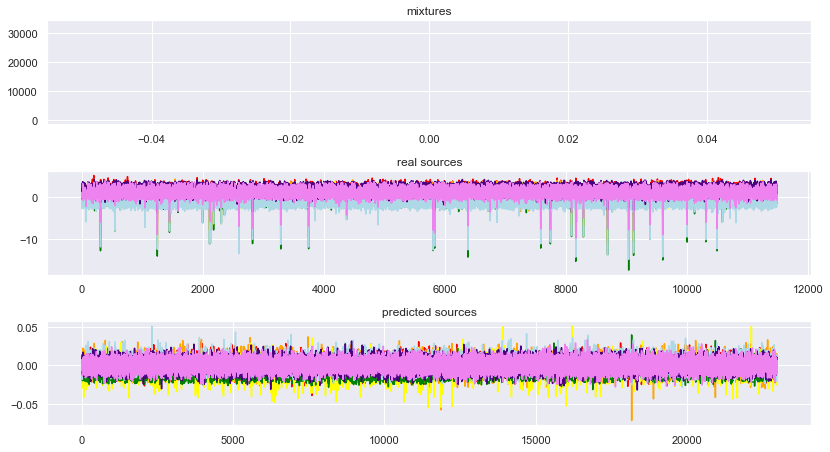

In [138]:
from sklearn.decomposition import FastICA
np.random.seed(0)
X = data.loc[:, data.columns!='target']
ica = FastICA(n_components=45)
S_ = ica.fit_transform(X)
fig = plt.figure()
models = [X, S, S_]
names = ['mixtures', 'real sources', 'predicted sources']
colors = ['red', 'orange', 'yellow', 'green', 'lightblue', 'indigo', 'violet']
for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(4, 1, i+1)
    plt.title(name)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color = color)
        
fig.tight_layout()        
plt.show()

In [139]:
icaFrame = pd.DataFrame(S_)
comb = [data['target'],icaFrame]
icaFrame.replace(np.nan, 0)
#icaFrame.insert(0, "target",data['target'], True)
#icaFrame.rename(columns = data.columns)

#newFrame.columns = data.columns
icaFrame.columns = data.columns[1:]
icaFrame
icaFrame.insert(0,"target", y_transformed)

In [140]:
data = icaFrame
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,0,0.013783,-0.005659,0.006067,-0.005010,-0.000978,-0.011020,0.000134,0.003706,-0.005387,...,0.004889,-0.003171,-0.001263,-0.016760,0.004903,0.002441,0.008494,0.002017,0.000447,-0.000741
1,0,-0.004072,-0.001996,0.006701,-0.006717,0.011297,0.007256,0.007633,-0.003929,-0.013962,...,0.002762,0.002114,0.005556,-0.016012,-0.010539,-0.009238,-0.004342,-0.001433,0.003127,0.004080
2,0,0.003778,0.001353,-0.007036,0.001681,-0.018175,-0.003193,0.004349,0.001326,-0.006384,...,-0.027242,0.001261,0.007148,-0.000757,-0.002462,-0.001403,0.011428,0.000571,-0.014269,0.005088
3,0,-0.001262,0.005036,0.006918,0.004392,-0.001263,0.007658,0.005899,-0.012891,0.001470,...,-0.009366,0.000481,-0.001667,0.005252,0.006835,-0.000857,-0.007938,0.003177,-0.001036,-0.010179
4,0,-0.005956,-0.000561,-0.009233,0.000917,-0.005579,0.001622,-0.004068,0.012658,-0.000374,...,0.011271,0.007498,0.000429,0.005864,0.000684,0.002545,0.001566,0.001173,0.005740,0.003582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22969,1,0.001135,-0.007087,0.004357,0.002680,-0.001418,-0.006283,-0.001228,-0.002211,0.007894,...,0.000037,0.002476,0.004095,0.002298,-0.002085,0.007293,0.004410,-0.005962,0.000640,0.003464
22970,1,-0.002767,0.010892,0.003689,-0.002442,0.013491,0.010760,-0.001966,-0.006324,-0.005965,...,-0.000045,-0.001697,0.004489,-0.004115,0.003970,0.001415,0.000692,0.000065,-0.003280,0.003990
22971,1,-0.001471,0.007294,-0.007655,0.002233,0.001205,-0.006387,-0.002612,-0.008573,0.011963,...,-0.021130,0.003517,-0.007999,-0.002473,-0.002144,0.004449,-0.004863,0.002750,-0.000544,-0.004613
22972,1,0.002809,0.001457,0.004899,0.006937,0.003708,0.000286,-0.011560,0.011981,0.010053,...,0.003577,0.003205,0.008913,0.006834,-0.000672,-0.001430,-0.005282,-0.001570,0.001047,-0.003655


In [141]:
#Scale by channel

from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import LabelBinarizer
#data['target'] = LabelBinarizer().fit_transform(data.target)

#scaler = MinMaxScaler().fit(data.loc[:, data.columns!='target'])

scalePOz = MinMaxScaler().fit(data[channelPOz])
scaleP3 = MinMaxScaler().fit(data[channelP3])
scaleP4 = MinMaxScaler().fit(data[channelP4])
scaleFz = MinMaxScaler().fit(data[channelFz])
scaleF3 = MinMaxScaler().fit(data[channelF3])
scaleF4 = MinMaxScaler().fit(data[channelF4])
scaleCz = MinMaxScaler().fit(data[channelCz])
scaleC3 = MinMaxScaler().fit(data[channelC3])
scaleC4 = MinMaxScaler().fit(data[channelC4])

data[channelPOz] = scalePOz.transform(data[channelPOz])
data[channelP3] = scaleP3.transform(data[channelP3])
data[channelP4] = scaleP4.transform(data[channelP4])
data[channelFz] = scaleFz.transform(data[channelFz])
data[channelF3] = scaleF3.transform(data[channelF3])
data[channelF4] = scaleF4.transform(data[channelF4])
data[channelCz] = scaleCz.transform(data[channelCz])
data[channelC3] = scaleC3.transform(data[channelC3])
data[channelC4] = scaleC4.transform(data[channelC4])

In [101]:
data #0 is low engagement, 1 is high engagement

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,0,0.547920,0.475734,0.505125,0.550692,0.332552,0.408914,0.385440,0.523713,0.651624,...,0.327157,0.549575,0.524631,0.439011,0.615528,0.629876,0.482988,0.701618,0.434600,0.393267
1,0,0.648020,0.505907,0.000000,0.592566,0.398524,0.437303,0.389219,0.545046,0.715076,...,0.458678,0.459693,0.459827,0.665722,0.695817,0.515056,0.507667,0.640876,0.635555,0.357893
2,0,0.622170,0.546320,0.426900,0.560186,0.334768,0.478401,0.257137,0.462955,0.703028,...,0.578034,0.469586,0.547897,0.466238,0.557657,0.660394,0.553736,0.582715,0.636282,0.350136
3,0,0.536884,0.450541,0.470239,0.446969,0.327745,0.414040,0.268322,0.548115,0.595539,...,0.398033,0.475406,0.565243,0.685785,0.676274,0.633227,0.581363,0.739234,0.483108,0.289461
4,0,0.250869,0.648607,0.562317,0.517486,0.199099,0.415292,0.310919,0.565508,0.471887,...,0.306184,0.603987,0.541451,0.471524,0.710798,0.524478,0.544587,0.662407,0.405746,0.290483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11482,0,0.445475,0.432162,0.550570,0.460577,0.180405,0.488024,0.373873,0.658364,0.693158,...,0.466293,0.465430,0.537041,0.448586,0.564540,0.538297,0.547980,0.646406,0.421602,0.222456
11483,0,0.428043,0.647730,0.435959,0.555125,0.414774,0.407371,0.355733,0.577763,0.598618,...,0.516216,0.584386,0.455544,0.454717,0.356687,0.719089,0.444563,0.490681,0.644179,0.380816
11484,0,0.561480,0.485369,0.431804,0.606092,0.259511,0.608195,0.358582,0.627616,0.555661,...,0.666830,0.514358,0.613899,0.585537,0.399254,0.584449,0.656879,0.415519,0.701703,0.371481
11485,0,0.568667,0.471361,0.538124,0.537229,0.434160,0.552236,0.383348,0.445457,0.660205,...,0.459577,0.428951,0.575069,0.514927,0.424380,0.601236,0.530726,0.428772,0.560719,0.327199


In [142]:
#Scale by frequency
from sklearn.preprocessing import MinMaxScaler


scaleAlpha = MinMaxScaler().fit(data[alphanodes])
scaleBeta = MinMaxScaler().fit(data[betanodes])
scaleGamma = MinMaxScaler().fit(data[gammanodes])
scaleDelta = MinMaxScaler().fit(data[deltanodes])
scaleTheta = MinMaxScaler().fit(data[thetanodes])

data[alphanodes] = scaleAlpha.transform(data[alphanodes])
data[betanodes] = scaleBeta.transform(data[betanodes])
data[gammanodes] = scaleGamma.transform(data[gammanodes])
data[deltanodes] = scaleDelta.transform(data[deltanodes])
data[thetanodes] = scaleTheta.transform(data[thetanodes])

data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,0,0.755421,0.607227,0.575391,0.371599,0.342853,0.329358,0.456821,0.536640,0.476730,...,0.627681,0.534873,0.567268,0.242214,0.547780,0.503943,0.582401,0.467608,0.436933,0.526748
1,0,0.500130,0.640825,0.581343,0.347635,0.497940,0.616577,0.578237,0.434142,0.358427,...,0.597712,0.592803,0.643775,0.252153,0.320078,0.296328,0.437264,0.420168,0.472523,0.568707
2,0,0.612378,0.671535,0.452358,0.465598,0.125592,0.452356,0.525062,0.504683,0.462968,...,0.174877,0.583454,0.661633,0.454968,0.439184,0.435613,0.615565,0.447714,0.241553,0.577480
3,0,0.540316,0.705318,0.583380,0.503680,0.339252,0.622894,0.550160,0.313827,0.571332,...,0.426795,0.574904,0.562733,0.534861,0.576263,0.445319,0.396608,0.483549,0.417252,0.444597
4,0,0.473205,0.653987,0.431733,0.454862,0.284730,0.528027,0.388791,0.656829,0.545886,...,0.717619,0.651816,0.586255,0.542998,0.485565,0.505794,0.504062,0.455992,0.507206,0.564376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22969,1,0.574579,0.594134,0.559338,0.479627,0.337292,0.403806,0.434774,0.457199,0.659959,...,0.559304,0.596767,0.627379,0.495583,0.444742,0.590195,0.536218,0.357889,0.439502,0.563350
22970,1,0.518798,0.759027,0.553064,0.407675,0.525653,0.671635,0.422820,0.401983,0.468760,...,0.558150,0.551027,0.631804,0.410329,0.534023,0.485707,0.494185,0.440754,0.387448,0.567929
22971,1,0.537330,0.726025,0.446543,0.473351,0.370433,0.402165,0.412366,0.371793,0.716092,...,0.261022,0.608179,0.491702,0.432157,0.443859,0.539634,0.431376,0.477688,0.423774,0.493049
22972,1,0.598513,0.672489,0.564421,0.539430,0.402055,0.507030,0.267494,0.647733,0.689740,...,0.609187,0.604763,0.681434,0.555894,0.465566,0.435133,0.426639,0.418284,0.444908,0.501380


In [103]:

mms_equations = MinMaxScaler()
data[equations] = mms_equations.fit_transform(data[equations])
data

KeyError: "None of [Index(['Equation1', 'EQ_Frontal', 'EQ_POz', 'Equation3', 'Eq3_POz',\n       'Equation4', 'Eq4_POz'],\n      dtype='object')] are in the [columns]"

In [380]:
data[equations].isna().sum()
#data = data.dropna()

Equation1     0
EQ_Frontal    0
EQ_POz        0
Equation3     0
Eq3_POz       0
Equation4     0
Eq4_POz       0
dtype: int64

In [104]:
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,0,0.547920,0.475734,0.505125,0.550692,0.332552,0.408914,0.385440,0.523713,0.651624,...,0.327157,0.549575,0.524631,0.439011,0.615528,0.629876,0.482988,0.701618,0.434600,0.393267
1,0,0.648020,0.505907,0.000000,0.592566,0.398524,0.437303,0.389219,0.545046,0.715076,...,0.458678,0.459693,0.459827,0.665722,0.695817,0.515056,0.507667,0.640876,0.635555,0.357893
2,0,0.622170,0.546320,0.426900,0.560186,0.334768,0.478401,0.257137,0.462955,0.703028,...,0.578034,0.469586,0.547897,0.466238,0.557657,0.660394,0.553736,0.582715,0.636282,0.350136
3,0,0.536884,0.450541,0.470239,0.446969,0.327745,0.414040,0.268322,0.548115,0.595539,...,0.398033,0.475406,0.565243,0.685785,0.676274,0.633227,0.581363,0.739234,0.483108,0.289461
4,0,0.250869,0.648607,0.562317,0.517486,0.199099,0.415292,0.310919,0.565508,0.471887,...,0.306184,0.603987,0.541451,0.471524,0.710798,0.524478,0.544587,0.662407,0.405746,0.290483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11482,0,0.445475,0.432162,0.550570,0.460577,0.180405,0.488024,0.373873,0.658364,0.693158,...,0.466293,0.465430,0.537041,0.448586,0.564540,0.538297,0.547980,0.646406,0.421602,0.222456
11483,0,0.428043,0.647730,0.435959,0.555125,0.414774,0.407371,0.355733,0.577763,0.598618,...,0.516216,0.584386,0.455544,0.454717,0.356687,0.719089,0.444563,0.490681,0.644179,0.380816
11484,0,0.561480,0.485369,0.431804,0.606092,0.259511,0.608195,0.358582,0.627616,0.555661,...,0.666830,0.514358,0.613899,0.585537,0.399254,0.584449,0.656879,0.415519,0.701703,0.371481
11485,0,0.568667,0.471361,0.538124,0.537229,0.434160,0.552236,0.383348,0.445457,0.660205,...,0.459577,0.428951,0.575069,0.514927,0.424380,0.601236,0.530726,0.428772,0.560719,0.327199


## Only run if 1 frequency band

In [234]:
#if only one frequency

data = data[gammanodes]
data

,target,POzGamma,P3Gamma,P4Gamma,FzGamma,F3Gamma,F4Gamma,CzGamma,C3Gamma,C4Gamma
10381,0.0,0.780993,0.734090,0.678397,0.772479,0.802443,0.814618,0.794403,0.743730,0.759201
4296,0.0,0.759903,0.781490,0.735170,0.790484,0.809155,0.812782,0.768642,0.825128,0.762941
10514,0.0,0.780060,0.729007,0.723293,0.757205,0.755630,0.797796,0.810204,0.715212,0.711179
1641,0.0,0.771186,0.743379,0.734181,0.757602,0.788343,0.800240,0.777569,0.769591,0.722430
10214,0.0,0.755523,0.705438,0.669894,0.760259,0.731158,0.834091,0.700599,0.742413,0.684118
...,...,...,...,...,...,...,...,...,...,...
33687,1.0,0.741333,0.742670,0.681399,0.764154,0.750982,0.736002,0.779618,0.802394,0.743700
13256,1.0,0.792022,0.771353,0.746878,0.816332,0.781250,0.839857,0.784252,0.817038,0.804023
24281,1.0,0.801130,0.705708,0.759748,0.768813,0.740391,0.776160,0.777145,0.745828,0.742270
28524,1.0,0.750173,0.733237,0.703076,0.798655,0.770049,0.821173,0.793442,0.778898,0.758479


In [354]:
## Feature select

high_relevant = ['target','FzGamma', 'C4Delta', 'POzGamma', 'C3Gamma', 'P4Gamma', 'F3Gamma',
                'C4Gamma', 'F4Delta','FzDelta' ]

#data = data[high_relevant]
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P4Alpha,P4Beta,P4Gamma,Equation1,EQ_Frontal,EQ_POz,Equation3,Eq3_POz,Equation4,Eq4_POz
11432,0.0,0.670532,0.757096,0.828901,0.874950,0.728149,0.596948,0.721601,0.846256,0.813246,...,0.833886,0.820344,0.729514,0.332919,0.111215,0.356387,0.005957,0.387499,0.038918,0.114613
28973,0.0,0.826201,0.883733,0.840447,0.843021,0.783521,0.763894,0.834735,0.868427,0.905870,...,0.858789,0.815049,0.753484,0.332649,0.111321,0.358382,0.005952,0.387229,0.039127,0.116769
14038,0.0,0.563487,0.687244,0.728883,0.819889,0.747421,0.503142,0.684913,0.821785,0.838587,...,0.719728,0.769528,0.759571,0.332536,0.111266,0.356513,0.005945,0.387185,0.038995,0.114466
32840,0.0,0.710268,0.828037,0.624516,0.796941,0.798748,0.880424,0.888790,0.792425,0.799101,...,0.651790,0.754695,0.765143,0.332433,0.111172,0.355981,0.005950,0.387046,0.038955,0.114358
3645,0.0,0.629607,0.786947,0.648281,0.811618,0.720572,0.468596,0.708807,0.770482,0.844438,...,0.739731,0.804920,0.748984,0.332406,0.111026,0.355974,0.005949,0.387028,0.038926,0.114405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15269,1.0,0.703443,0.719062,0.661755,0.798725,0.773688,0.683857,0.742108,0.725055,0.788791,...,0.695377,0.785163,0.767532,0.293035,0.111227,0.356286,0.005943,0.345773,0.039044,0.114482
26388,1.0,0.717912,0.832005,0.750848,0.793418,0.685116,0.893740,0.920824,0.864943,0.817881,...,0.788012,0.724743,0.683568,0.332586,0.111068,0.355997,0.005951,0.387151,0.038805,0.114111
26473,1.0,0.621429,0.754587,0.766313,0.817016,0.747200,0.512688,0.699743,0.790070,0.843528,...,0.778382,0.774770,0.757822,0.332711,0.111255,0.356073,0.005954,0.387228,0.039031,0.114024
26847,1.0,0.507696,0.710501,0.787890,0.870101,0.901689,0.403006,0.682096,0.818343,0.892046,...,0.808386,0.835869,0.888343,0.331540,0.111256,0.356262,0.005963,0.386108,0.039059,0.114470


In [143]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(data.loc[:, data.columns!='target'], #feature columns
                                                                            data["target"], #target labels
                                                                            test_size=0.25, #train/test ratio
                                                                           # random_state=99 #random seed
                                                                            )

In [153]:
from sklearn.decomposition import PCA
pca = PCA(.95)

pca.fit(features_train)

features_train_pca = pca.transform(features_train)
features_test_pca = pca.transform(features_test)

In [154]:


model_pca = SVC(kernel = 'rbf', C = 5)
model_pca.fit(features_train_pca,target_train)

#print(pca.singular_values_)
#print(pca.explained_variance_ratio_)

SVC(C=5)

In [155]:
print('Individual')
print("Accuracy on training set: {:.3f}".format(model_pca.score(features_train_pca, target_train)))
print("Accuracy on test set: {:.3f}".format(model_pca.score(features_test_pca, target_test)))
DTScores = cross_val_score(model_pca, features_train, target_train, cv= 3)
print(DTScores)
print(f"Mean Cross-Validation score: {np.mean(DTScores):.3f}")
print('\n')

Individual
Accuracy on training set: 0.934
Accuracy on test set: 0.675
[0.68941504 0.67647571 0.67525683]
Mean Cross-Validation score: 0.680




## Many Models Yes


In [150]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

#model1 = DecisionTreeClassifier(max_depth = 24)
model2 = SVC(kernel = 'rbf')
#model3 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(50,50,10), max_iter = 1000)
#model4 = GradientBoostingClassifier(n_estimators=500, subsample=1, learning_rate=1e-5)
#model5 =  LogisticRegression(C=5, max_iter = 500)
#model6 = RandomForestClassifier(n_estimators=500, max_depth = 24)
#model7= KNeighborsClassifier(n_neighbors=5)

#model1.fit(features_train,target_train)
model2.fit(features_train,target_train)
#model3.fit(features_train_pca, target_train)
#model4.fit(features_train, target_train)
#model5.fit(features_train_pca, target_train)
#model6.fit(features_train, target_train)
#model7.fit(features_train, target_train)


#pred1=model1.predict(features_test)
pred2=model2.predict(features_test)
#pred3=model3.predict(features_test_pca)
#pred4=model4.predict(features_test)
#pred5=model5.predict(features_test_pca)
#pred6=model6.predict(features_test)
#pred7=model7.predict(features_test)


final_pred = np.array([])
for i in range(0,len(features_test)):
    m = stats.mode([pred2[i]])
    final_pred = np.append(final_pred, m[0])

print("Accuracy: ", np.mean(final_pred - target_test == 0))


Accuracy:  0.6854108635097493


In [152]:
print('Individual')
print("Accuracy on training set: {:.3f}".format(model2.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model2.score(features_test, target_test)))
DTScores = cross_val_score(model2, features_train, target_train, cv= 3)
print(DTScores)
print(f"Mean Cross-Validation score: {np.mean(DTScores):.3f}")
print('\n')

Individual
Accuracy on training set: 0.738
Accuracy on test set: 0.685
[0.68488858 0.67072958 0.67316733]
Mean Cross-Validation score: 0.676




## Ensemble Training


In [432]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[ ('MLP', model3), 
                                     
                                     ('SVC', model_pca)
                                     
                                     ], voting='soft') 
model.fit(features_train_pca,target_train)
print("Voting Test score: ", model.score(features_test_pca,target_test))

VotingScores = cross_val_score(model, features_train_pca, target_train, cv=3)
print(VotingScores)
print(f"Mean 5-fold Cross-Validation score: {np.mean(VotingScores):.3f}")

Voting Test score:  0.690633704735376


KeyboardInterrupt: 

## Save Model

In [134]:
import pickle
# save the model to disk
filename = 'BinaryEnsemble125.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

## Evaluation

In [387]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

pred_ensemble=model1.predict(features_test)

print("Accuracy: {:.3f}".format(accuracy_score(target_test, pred_ensemble)))
print("Precision: {:.3f}".format(precision_score(target_test, pred_ensemble)))
print("Recall: {:.3f}".format(recall_score(target_test, pred_ensemble)))
print("F-Score: {:.3f}".format(f1_score(target_test, pred_ensemble)))

Accuracy: 0.179


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

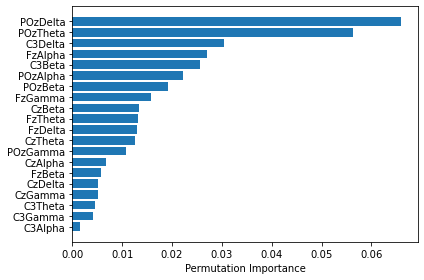

In [335]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


perm_importance = permutation_importance(model_pca, features_test_pca, target_test, n_repeats = 1)

feature_names = list(features_train.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.tight_layout()
plt.savefig('PermutationImportanceScaled.png', dpi = 300)

In [337]:

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()
explainer = shap.Explainer(model_pca.predict, features_train_pca)
shap_values = explainer(features_train_pca)

#from sklearn_rvm import EMRVR
#model_rvr=EMRVR(kernel="linear").fit(features_train, target_train)
#explainer = shap.KernelExplainer(model_rvr.predict, features_train)

Permutation explainer:   0%|                                                    | 2/17230 [01:53<542:44:21, 113.41s/it]


KeyboardInterrupt: 

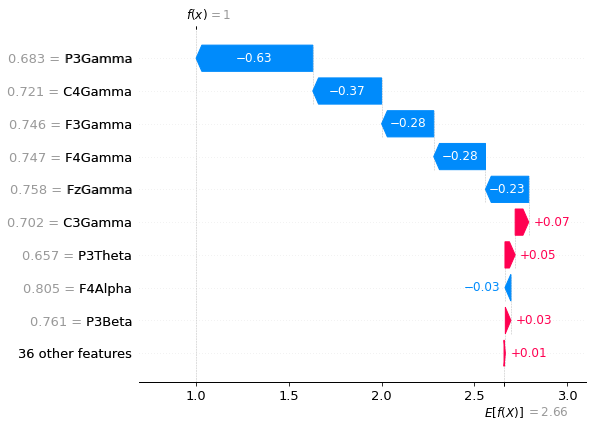

In [79]:
import matplotlib.pyplot as plt
shap.plots.waterfall(shap_values[0], show = False)
plt.savefig('ShapWaterfall.png', dpi = 300, bbox_inches='tight')
plt.show()

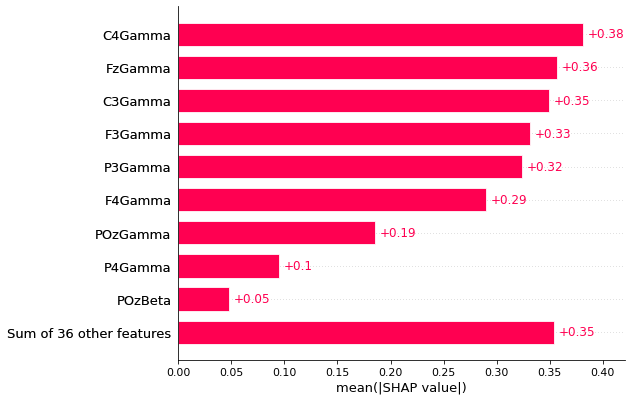

In [80]:
shap.plots.bar(shap_values, show = False)
plt.savefig('ShapBarplot.png', dpi = 300, bbox_inches='tight')
plt.show()

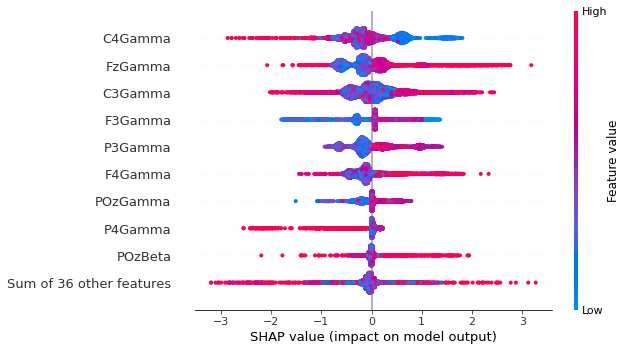

In [81]:
shap.plots.beeswarm(shap_values, show = False)
plt.savefig('ShapBees.png', dpi = 300, bbox_inches='tight')
plt.show()

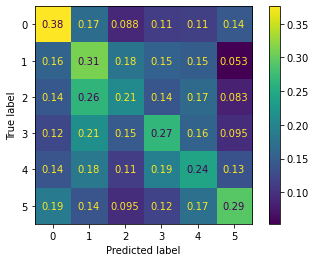

In [386]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_pca, features_test_pca, target_test, normalize = 'true') 

plt.grid(False)
plt.savefig('ConfusionPCASVM.png', dpi = 300)
plt.show()


In [31]:
print('Decision Tree')
print("Accuracy on training set: {:.3f}".format(model1.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model1.score(features_test, target_test)))
DTScores = cross_val_score(model1, features_train, target_train, cv= 3)
print(DTScores)
print(f"Decision Treet mean 5-fold Cross-Validation score: {np.mean(DTScores):.3f}")
print('\n')


print('SVC')
print("Accuracy on training set: {:.3f}".format(model2.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model2.score(features_test, target_test)))
SVCScores = cross_val_score(model2, features_train, target_train, cv= 3)
print(SVCScores)
print(f"SVC mean 5-fold Cross-Validation score: {np.mean(SVCScores):.3f}")
print('\n')


print('MLP')
print("Accuracy on training set: {:.3f}".format(model3.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model3.score(features_test, target_test)))
MLPScores = cross_val_score(model3, features_train, target_train, cv= 3)
print(MLPScores)
print(f"MLP mean 5-fold Cross-Validation score: {np.mean(MLPScores):.3f}")
print('\n')


print('GBC')
print("Accuracy on training set: {:.3f}".format(model4.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model4.score(features_test, target_test)))
GBCScores = cross_val_score(model4, features_train, target_train, cv= 3)
print(GBCScores)
print(f"GBC mean 5-fold Cross-Validation score: {np.mean(GBCScores):.3f}")
print('\n')


print('Logistic Regression')
print("Accuracy on training set: {:.3f}".format(model5.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model5.score(features_test, target_test)))
print('\n')
LRScores = cross_val_score(model5, features_train, target_train, cv =3)
print(LRScores)
print(f"Logistic Regression mean 5-fold Cross-Validation score: {np.mean(LRScores):.3f}")
print('\n')

print('Random Forest')
print("Accuracy on training set: {:.3f}".format(model6.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model6.score(features_test, target_test)))
RFScores = cross_val_score(model6, features_train, target_train, cv=3)
print(RFScores)
print(f"Random Forest mean 5-fold Cross-Validation score: {np.mean(RFScores):.3f}")
print('\n')


print('KNN')
print("Accuracy on training set: {:.3f}".format(model7.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model7.score(features_test, target_test)))
KNNScores = cross_val_score(model7, features_train, target_train, cv= 3)
print(KNNScores)
print(f"KNN mean 5-fold Cross-Validation score: {np.mean(KNNScores):.3f}")
print('\n')


Decision Tree
Accuracy on training set: 0.656
Accuracy on test set: 0.645
[0.64896859 0.63326301 0.64716915]
Decision Treet mean 5-fold Cross-Validation score: 0.643


SVC


AttributeError: 'SVC' object has no attribute 'shape_fit_'

In [28]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


perm_importance = permutation_importance(rf, features_test, target_test, n_repeats = 30)

feature_names = list(features_train.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.tight_layout()
plt.savefig('PermutationImportanceEnsemble.png', dpi = 300)

KeyboardInterrupt: 

Feature: 0, Score: 7.18397
Feature: 1, Score: -0.58334
Feature: 2, Score: -1.82796
Feature: 3, Score: -5.22998
Feature: 4, Score: -2.01787
Feature: 5, Score: -1.51095
Feature: 6, Score: -0.48181
Feature: 7, Score: -0.73425
Feature: 8, Score: 0.60320
Feature: 9, Score: 2.80587
Feature: 10, Score: 9.18173
Feature: 11, Score: 0.57083
Feature: 12, Score: 0.57821
Feature: 13, Score: 0.80073
Feature: 14, Score: 3.51832
Feature: 15, Score: -0.13344
Feature: 16, Score: 0.66199
Feature: 17, Score: 1.15733
Feature: 18, Score: -1.23336
Feature: 19, Score: -3.56314
Feature: 20, Score: -4.21619
Feature: 21, Score: -0.10243
Feature: 22, Score: -0.41762
Feature: 23, Score: -0.28116
Feature: 24, Score: 0.29199
Feature: 25, Score: -1.31593
Feature: 26, Score: -0.03240
Feature: 27, Score: 1.23506
Feature: 28, Score: -1.50039
Feature: 29, Score: 0.03962
Feature: 30, Score: -3.86701
Feature: 31, Score: -1.11999
Feature: 32, Score: -0.40292
Feature: 33, Score: -2.40957
Feature: 34, Score: 0.10409
Feature: 

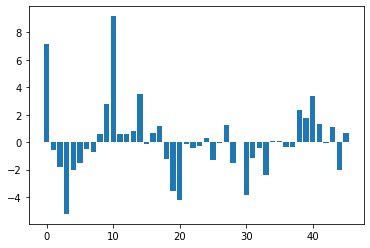

In [26]:

# linear regression feature importance
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
#features_train, target_train = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(features_train, target_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()